In [ ]:
import numpy as np
np.set_printoptions(threshold=np.inf)

file = np.load('Features/i3d-features/RGBTest/Fast.Furious.6.2013__#01-03-25_01-04-59_label_B1-0-0__2.npy')
print(file.shape)
file2 = np.load('Features/vggish-features/test/Fast.Furious.6.2013__#01-03-25_01-04-59_label_B1-0-0__vggish.npy')
print(file2.shape)

Accuracy: [0.72492988 0.73170344 0.77091243 0.80788874 0.80804923 0.79053452
 0.79342289 0.79164807 0.8014044  0.78966771 0.79288692 0.79192742
 0.79263289 0.78497063 0.78811689 0.78625497 0.78657895 0.79624345
 0.79013158 0.79288478 0.79476129 0.79091772 0.79624603 0.78920598
 0.79268352 0.79138245 0.79361341 0.7938756  0.79439612 0.79737502
 0.79421203 0.79503764 0.79684679 0.79234409 0.79520457 0.79778182
 0.80157262 0.79631468 0.79847141 0.79745184 0.79507369 0.79927128
 0.79055512 0.80458328 0.80106841 0.79543243 0.79104517 0.80175585
 0.7992627  0.79992353]
F1: [0.77122935 0.77360785 0.80885184 0.83519592 0.83665129 0.82206562
 0.82579613 0.82407124 0.83177054 0.82301919 0.82557164 0.82525177
 0.82566396 0.81983407 0.82171472 0.82094373 0.82178551 0.82834661
 0.82373521 0.82538229 0.82706614 0.82406437 0.82947475 0.8229335
 0.82621181 0.8250907  0.82685408 0.82727484 0.82681703 0.82971841
 0.82715312 0.82793458 0.82942888 0.82530186 0.82850923 0.83005268
 0.83247086 0.82861275 0.

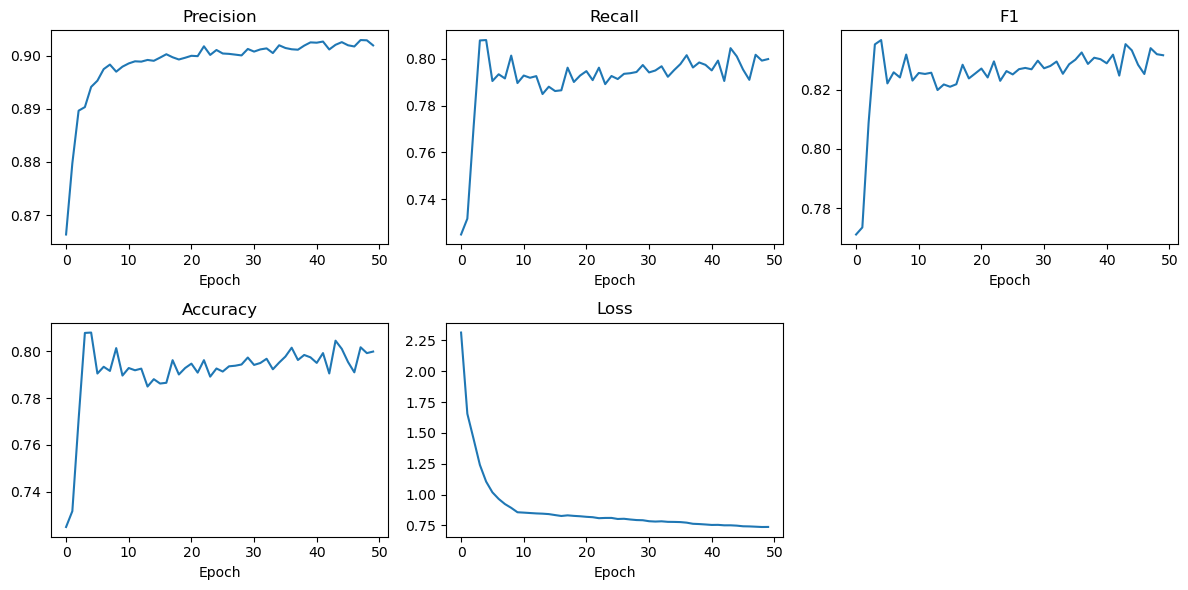

In [4]:
from matplotlib import pyplot as plt
import numpy as np

precision = np.load('ckpt/Binary Normal Adam/precision_Binary_Normal.npy')
recall = np.load('ckpt/Binary Normal Adam/recall_Binary_Normal.npy')
roc_auc = np.load('ckpt/Binary Normal Adam/roc_auc_Binary_Normal.npy')
f1 = np.load('ckpt/Binary Normal Adam/f1_Binary_Normal.npy')
accuracy = np.load('ckpt/Binary Normal Adam/accuracy_Binary_Normal.npy')
# report = np.load('ckpt/Binary Normal Adam/report_Binary_Normal.npy', allow_pickle=True)
# print(f'Accuracy: {accuracy} \n F1: {f1} \n Precision: {precision} \n Recall: {recall} \n ROC AUC: {roc_auc} \n')
# print(report[-1])

print(f'Accuracy: {accuracy}')
print(f'F1: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'ROC AUC: {roc_auc}')


loss = np.load('ckpt/Binary Normal Adam/train_losses_Binary_Normal.npy')
print(f'Loss: {loss}')
# plt.plot(loss)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

# Plot data on each subplot 
axes[0, 0].plot(precision)
axes[0, 0].set_title('Precision') 
axes[0, 0].set_xlabel('Epoch')
axes[0, 1].plot(recall)
axes[0, 1].set_title('Recall')
axes[0, 1].set_xlabel('Epoch')
axes[0, 2].plot(f1)
axes[0, 2].set_title('F1')
axes[0, 2].set_xlabel('Epoch')
axes[1, 0].plot(accuracy)
axes[1, 0].set_title('Accuracy')
axes[1, 0].set_xlabel('Epoch')
axes[1, 1].plot(loss)
axes[1, 1].set_title('Loss')
axes[1, 1].set_xlabel('Epoch')
axes[1, 2].set_visible(False)

# Optional: Adjust spacing between subplots
fig.tight_layout()

plt.show()

In [6]:
import numpy as np
import os
import cv2

cap = cv2.VideoCapture(os.path.join('Features\Videos','Fast.Furious.6.2013__#01-03-25_01-04-59_label_B1-0-0.mp4'))
lens = int(cap.get(7))
print(lens)

2256


In [14]:
import numpy as np
import pandas as pd
import torch

labels = np.load('ckpt/all_data_labels.npy')
torch_labels = torch.tensor(labels, dtype=torch.int64) 

# Calculate class frequencies
class_counts = torch.bincount(torch_labels)
print(class_counts)

# Calculate inverse class frequencies
class_weights = 1.0 / class_counts
print(class_weights)

# Normalize weights
class_weights /= class_weights.sum()
print(class_weights)

# Calculate sample weights based on class imbalance
sample_weights = class_weights[torch_labels]
print(sample_weights)


tensor([10255,  2220,  1680,  1565,  1905,   180,  1965])
tensor([9.7513e-05, 4.5045e-04, 5.9524e-04, 6.3898e-04, 5.2493e-04, 5.5556e-03,
        5.0891e-04])
tensor([0.0116, 0.0538, 0.0711, 0.0763, 0.0627, 0.6636, 0.0608])
torch.Size([19770])
